In [1]:
import pandas as pd
from data import constants
from mathutil import comp, percentage, analyze, electrons
from plotutil import stackedbar
from mathutil.analyze import groupBy
import numpy as np
from plotutil import periodictable

In [53]:
df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.fillna("", inplace=True)
cr_bro = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining - Chromyl\Results.xlsx")
df = pd.concat([df, cr_bro])
df["Group"] = df["Group"].astype(str)
# dataset = df.loc[(df["Type"] != "Porphyrin")]
dataset = df.loc[(df["Type"] == "Corrole") & (df["Class"] == "Corrole")]
len(dataset)

872

In [54]:
dataset["AxialLigand"] = dataset.apply(
    lambda x:
    "Py2" if x["AxialLigand"] == "(Py)2"
    else x["AxialLigand"]
    ,axis = 1
)
dataset = electrons.createElectronData(dataset)
# dataset = df.loc[(df["Type"] !=  "Porphyrin")]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset = percentage.createCompPercData(dataset)
dataset = comp.createSumData(dataset)
dataset = percentage.createSumPercData(dataset)
dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)
len(dataset)

C:\Users\jenso\AppData\Local\Temp/ipykernel_5908/1199940331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["AxialLigand"] = dataset.apply(
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\electrons.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["D"] = df.apply(
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\electrons.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

872

In [4]:

group = dataset.loc[dataset["D"] != "-"]

In [5]:
from matplotlib import pyplot as plt
from plotutil.misc import cm_to_inch
import matplotlib
! pip install SciencePlots
! pip install natsort
from natsort import index_natsorted

In [6]:
plt.style.use(['science', 'nature', 'no-latex'])
plt.rcParams["figure.figsize"] = (cm_to_inch(16), cm_to_inch(13))
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["font.family"] = "Arial"

In [7]:
dataset.columns

Index(['Unnamed: 0', 'CCDC', 'Class', 'Ligand', 'Metal', 'Group',
       'AxialLigand', 'CoordNo', 'SubstNo', 'CoSolv', 'Id', 'Type', 'DoopExp',
       'DoopSim', 'Doming1', 'Saddling1', 'Ruffling1', 'WavingX1', 'WavingY1',
       'Propellering1', 'Doming2', 'Saddling2', 'Ruffling2', 'WavingX2',
       'WavingY2', 'Propellering2', 'Cavity', 'MetalToN4', 'MetalToMean', 'D',
       'd-electrons', 'Doming1%', 'Saddling1%', 'Ruffling1%', 'WavingX1%',
       'WavingY1%', 'Propellering1%', 'Doming2%', 'Saddling2%', 'Ruffling2%',
       'WavingX2%', 'WavingY2%', 'Propellering2%', 'Doming comp',
       'Saddling comp', 'Ruffling comp', 'WavingX comp', 'WavingY comp',
       'Propellering comp', 'Doming comp%', 'Saddling comp%', 'Ruffling comp%',
       'WavingX comp%', 'WavingY comp%', 'Propellering comp%', 'Doming summed',
       'Saddling summed', 'Ruffling summed', 'WavingX summed',
       'WavingY summed', 'Propellering summed', 'Doming summed%',
       'Saddling summed%', 'Ruffling summed

In [8]:
group = dataset.groupby("dominant")
group.count()

Unnamed: 0  CCDC  Class  Ligand  Metal  Group  AxialLigand  \
dominant                                                                        
Doming comp               538   538    538     538    538    538          538   
Propellering comp           1     1      1       1      1      1            1   
Ruffling comp             170   170    170     170    170    170          170   
Saddling comp             435   435    435     435    435    435          435   
WavingX comp              100   100    100     100    100    100          100   
WavingY comp               92    92     92      92     92     92           92   

                   CoordNo  SubstNo  CoSolv  ...  Ruffling summed  \
dominant                                     ...                    
Doming comp            538      538     536  ...              538   
Propellering comp        1        1       1  ...                1   
Ruffling comp          170      170     167  ...              170   
Saddling comp          435      435     433  ...              435   
WavingX comp           100      100     100  ...              100   
WavingY comp            92       92      92  ...               92   

                   WavingX summed  WavingY summed  Propellering summed  \
dominant                                                                 
Doming comp                   538             538                  538   
Propellering comp               1               1                    1   
Ruffling comp                 170             170                  170   
Saddling comp                 435             435                  435   
WavingX comp                  100             100                  100   
WavingY comp                   92              92                   92   

                   Doming summed%  Saddling summed%  Ruffling summed%  \
dominant                                                                
Doming comp                   537               537               537   
Propellering comp               1                 1                 1   
Ruffling comp                 170               170               170   
Saddling comp                 435               435               435   
WavingX comp                  100               100               100   
WavingY comp                   92                92                92   

                   WavingX summed%  WavingY summed%  Propellering summed%  
dominant                                                                   
Doming comp                    537              537                   537  
Propellering comp                1                1                     1  
Ruffling comp                  170              170                   170  
Saddling comp                  435              435                   435  
WavingX comp                   100              100                   100  
WavingY comp                    92               92                    92  

[6 rows x 67 columns]

C:\Users\jenso\AppData\Local\Temp/ipykernel_5908/2773860110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["CoordNo_x"] = dataset.apply(


(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, xlabel='Koordinationszahl', ylabel='$\\mathregular{D_{oop}}$ /Å'>)

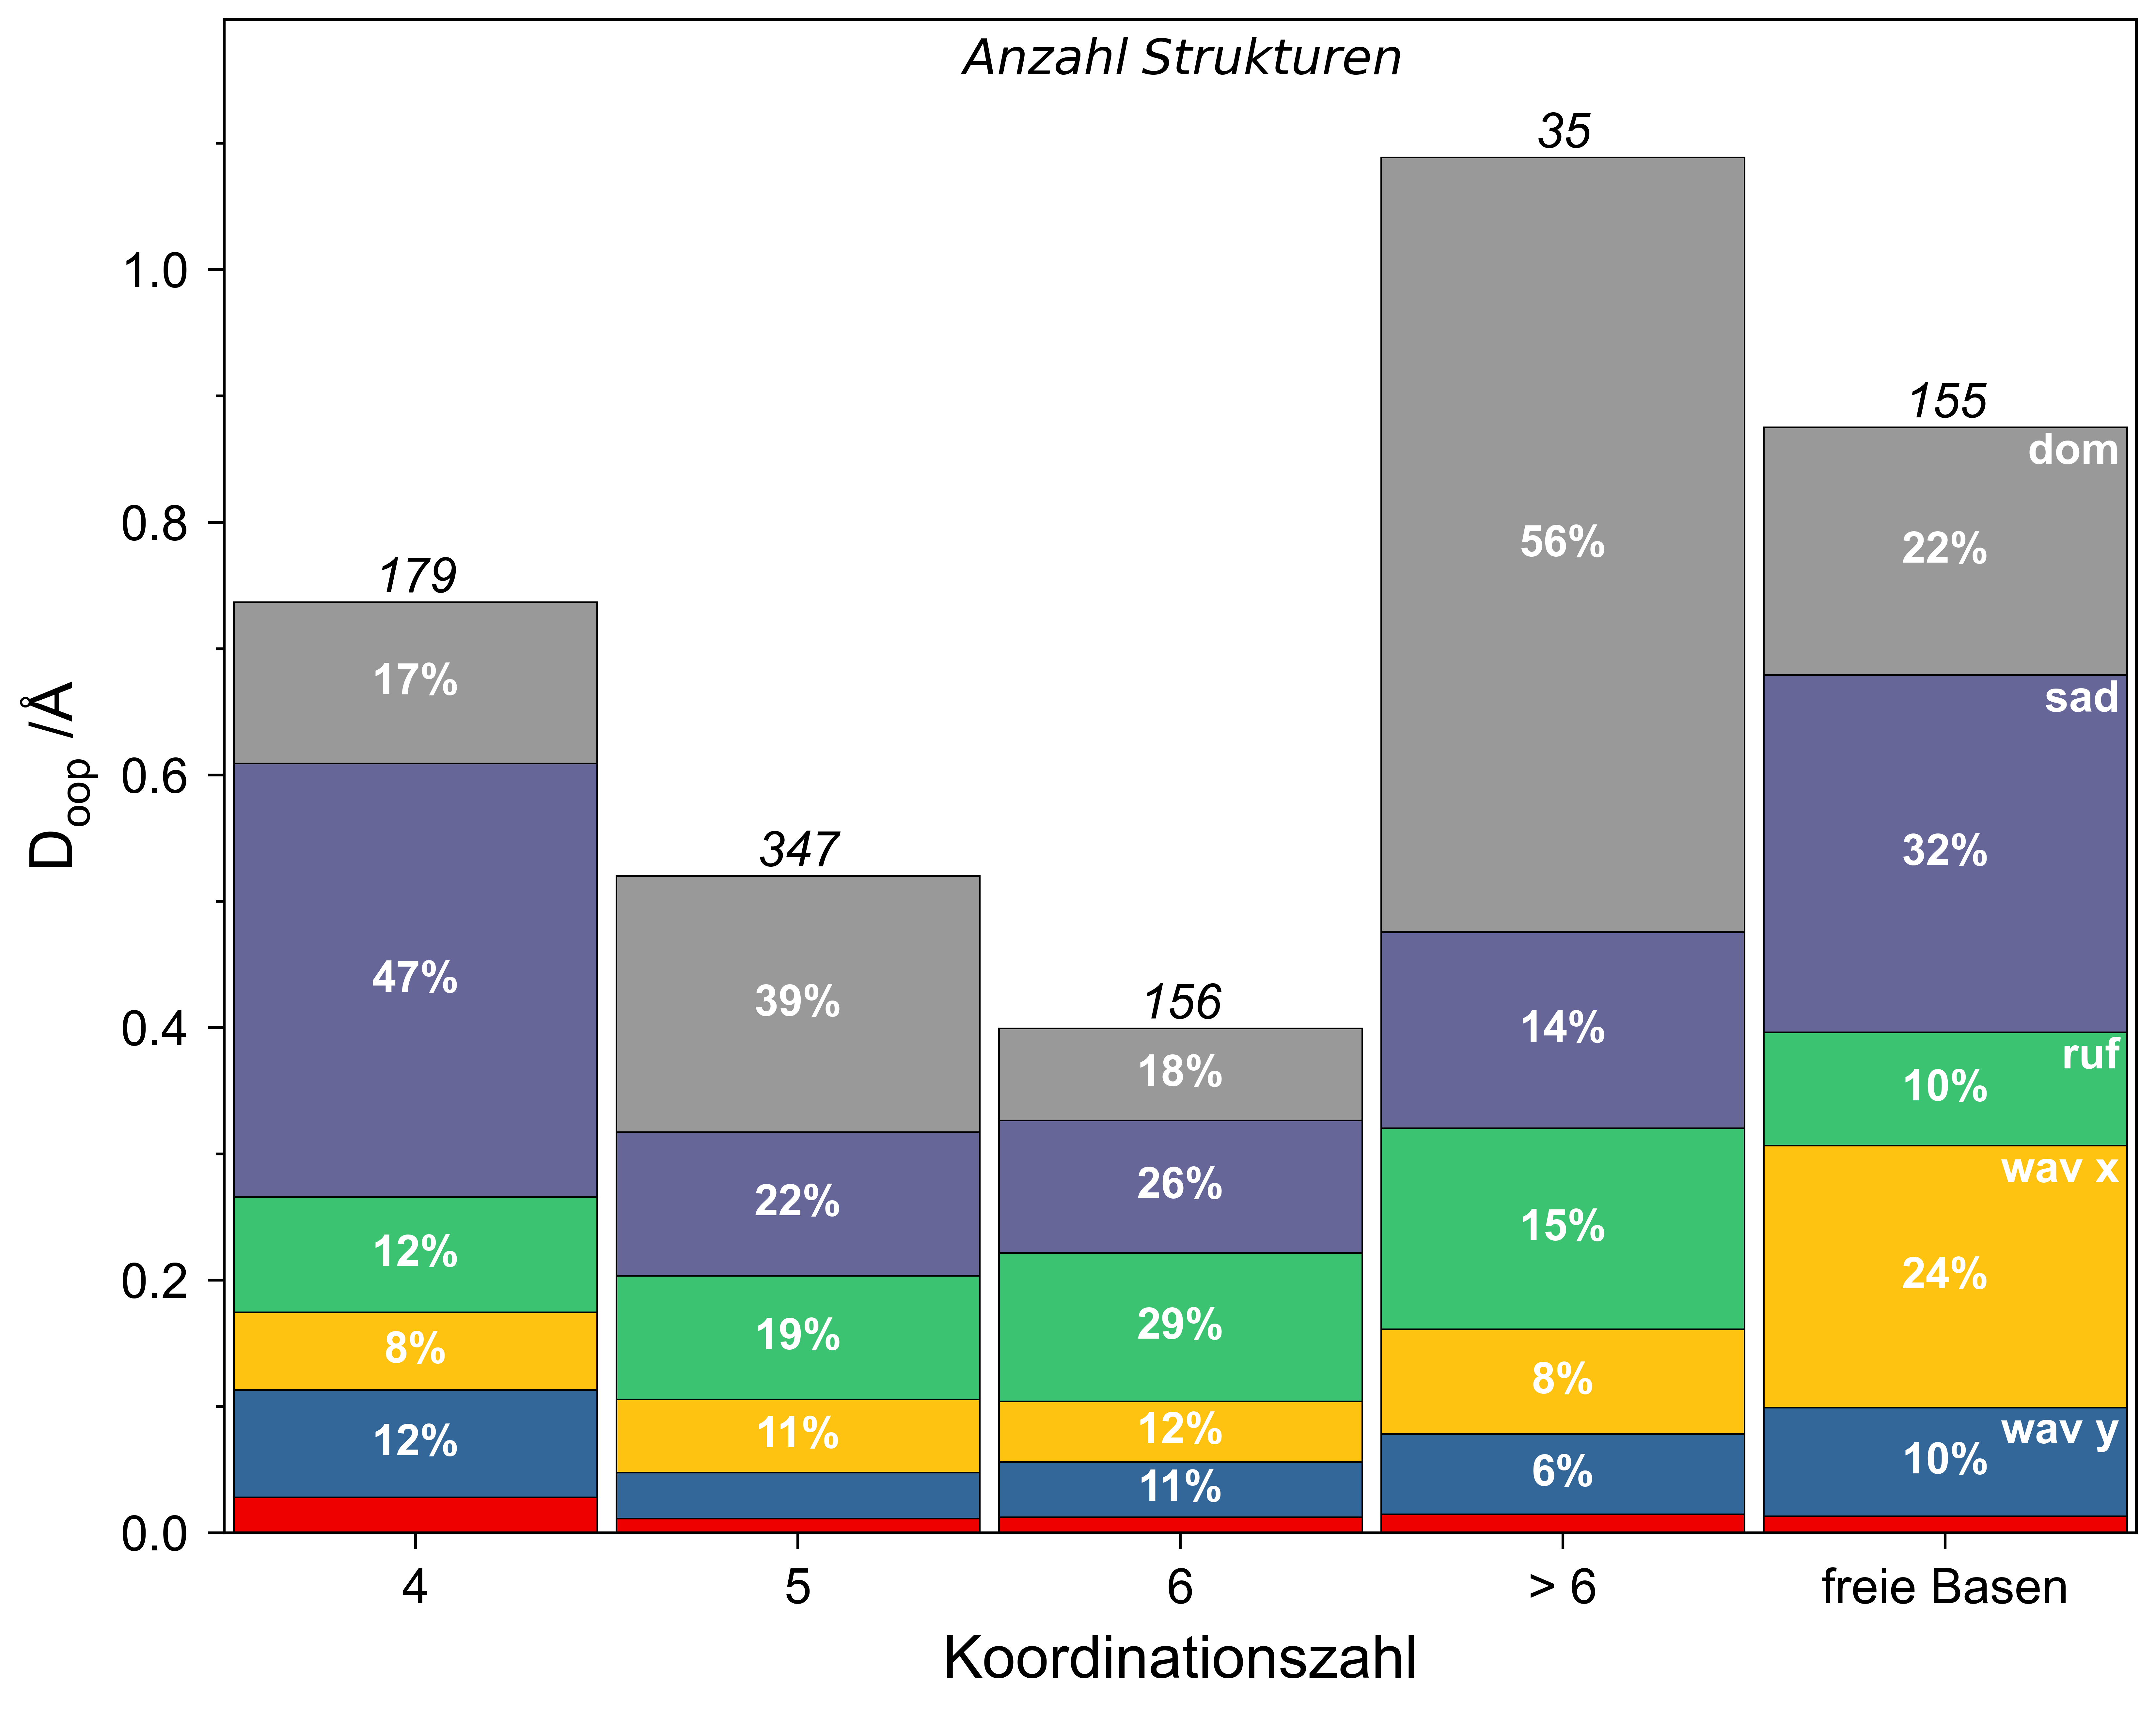

In [55]:
dataset["CoordNo_x"] = dataset.apply(
    lambda x:
        "freie Basen" if x["CoordNo"] == 0 
        else "4" if x["CoordNo"] == 4
        else x["CoordNo"] if x["CoordNo"] > 4 and x["CoordNo"] <=6
        else "> 6",
        axis=1
)
group = groupBy(dataset, constants.percCompColumns, "CoordNo_x")
group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
stackedbar.plot(group, "Koordinationszahl", constants.compColumns)

C:\Users\jenso\AppData\Local\Temp/ipykernel_5908/470431190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Metal_x"] = dataset.apply(lambda x:


(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, ylabel='$\\mathregular{D_{oop}}$ /Å'>)

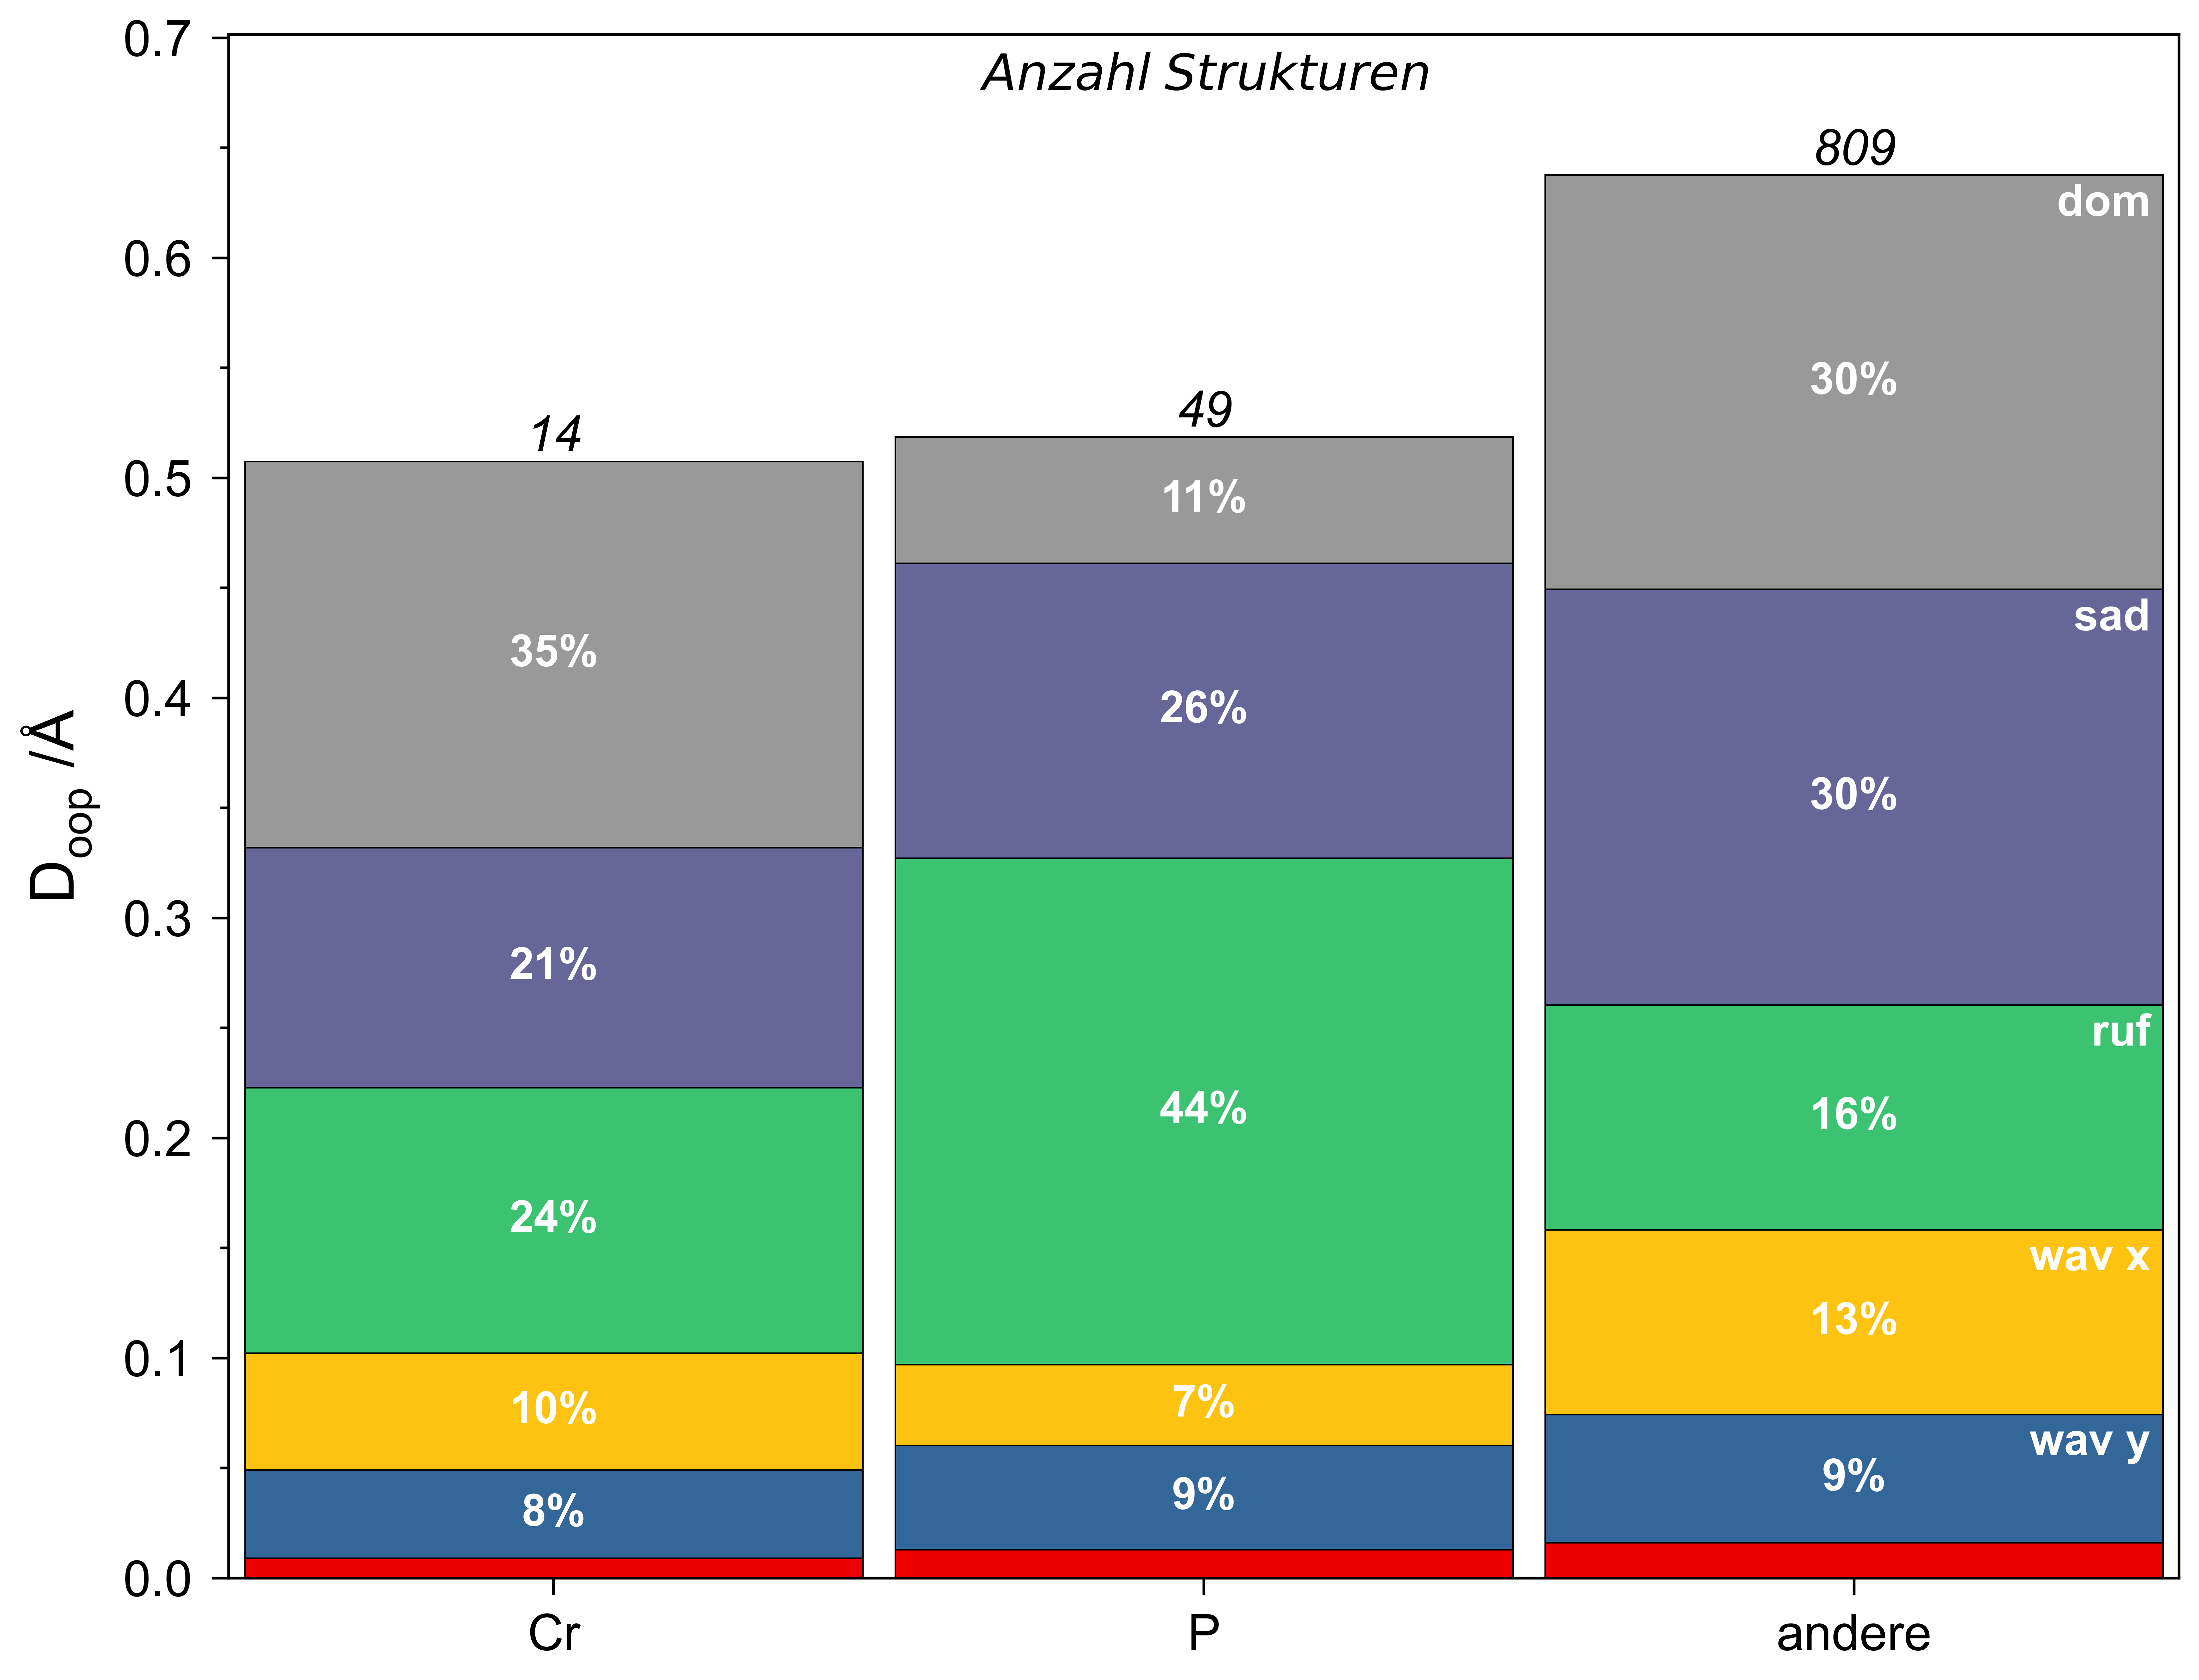

In [65]:
dataset["Metal_x"] = dataset.apply(lambda x:
                x["Metal"] if x["Metal"] in ["Cr", "P"]
                else "andere", 
                axis=1)
group = groupBy(dataset, constants.percCompColumns, "Metal_x")
stackedbar.plot(group, "", constants.compColumns)

(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, xlabel='d-Elektronen', ylabel='$\\mathregular{D_{oop}}$ /Å'>)

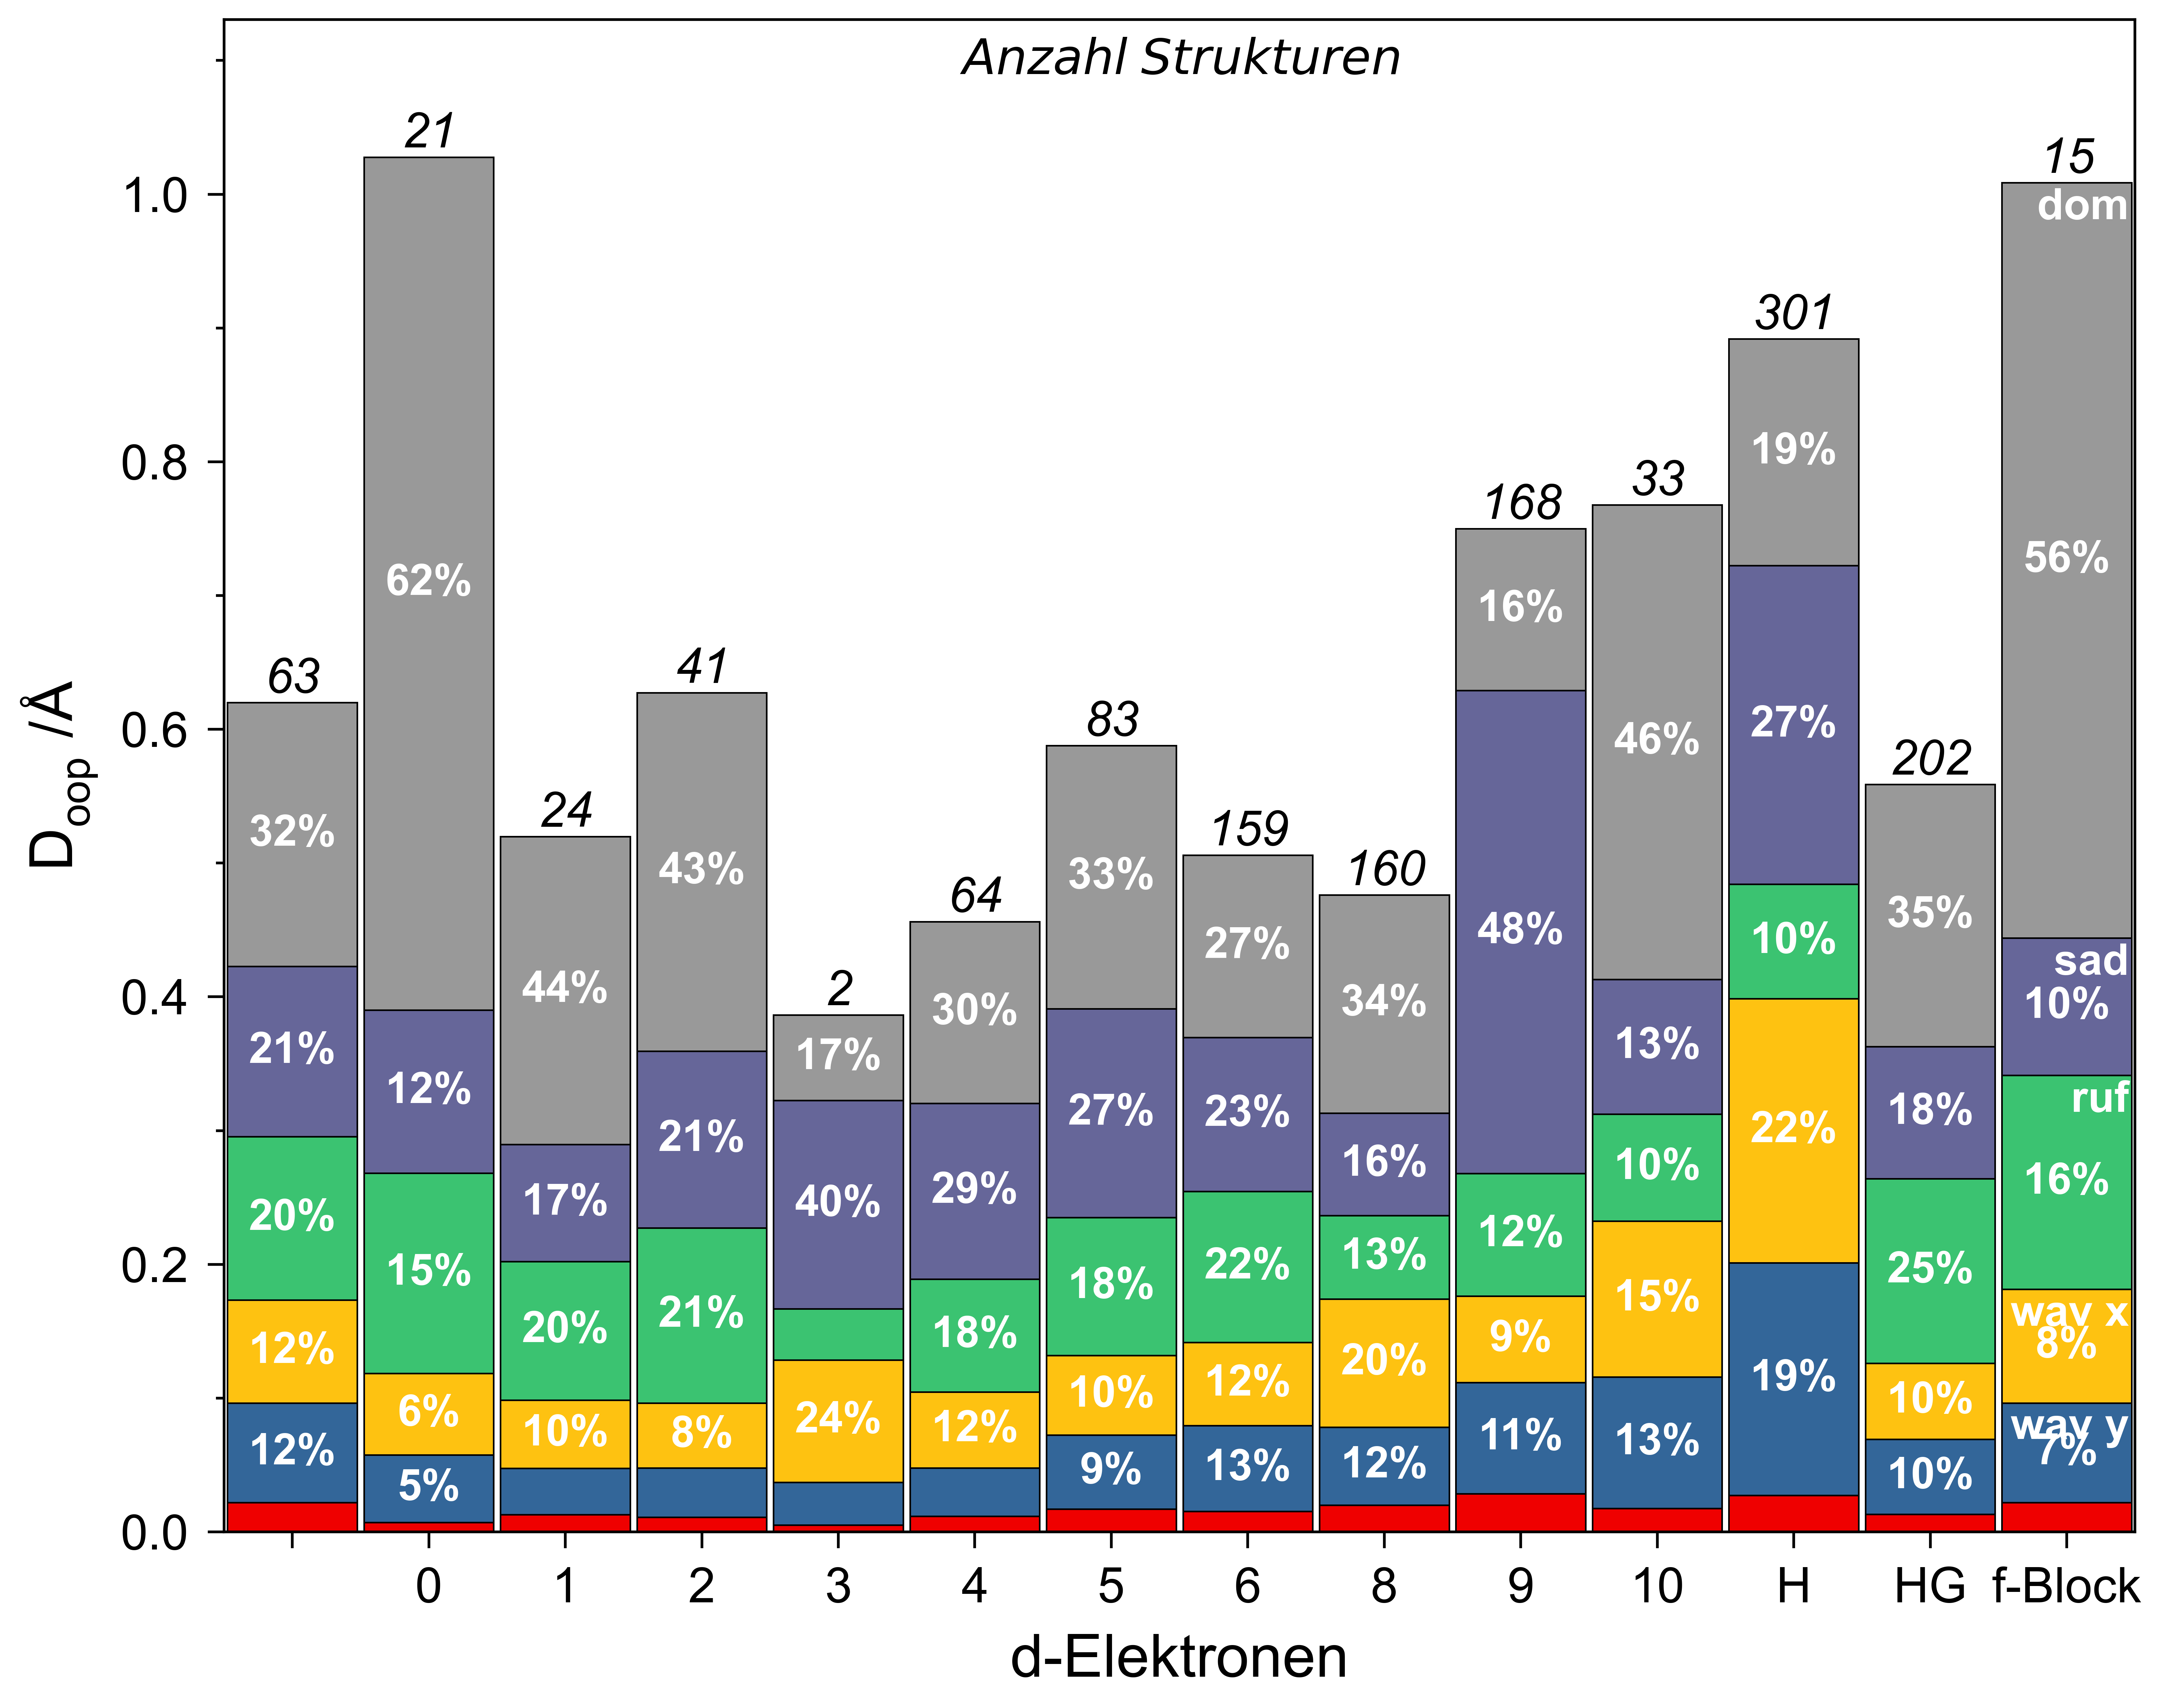

In [9]:
group = groupBy(dataset, constants.percCompColumns, "d-electrons")
group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
stackedbar.plot(group, "d-Elektronen", constants.compColumns)

C:\Users\jenso\AppData\Local\Temp/ipykernel_5908/2056361643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group["Class"] = group.apply(lambda x:


(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, ylabel='$\\mathregular{D_{oop}}$ /Å'>)

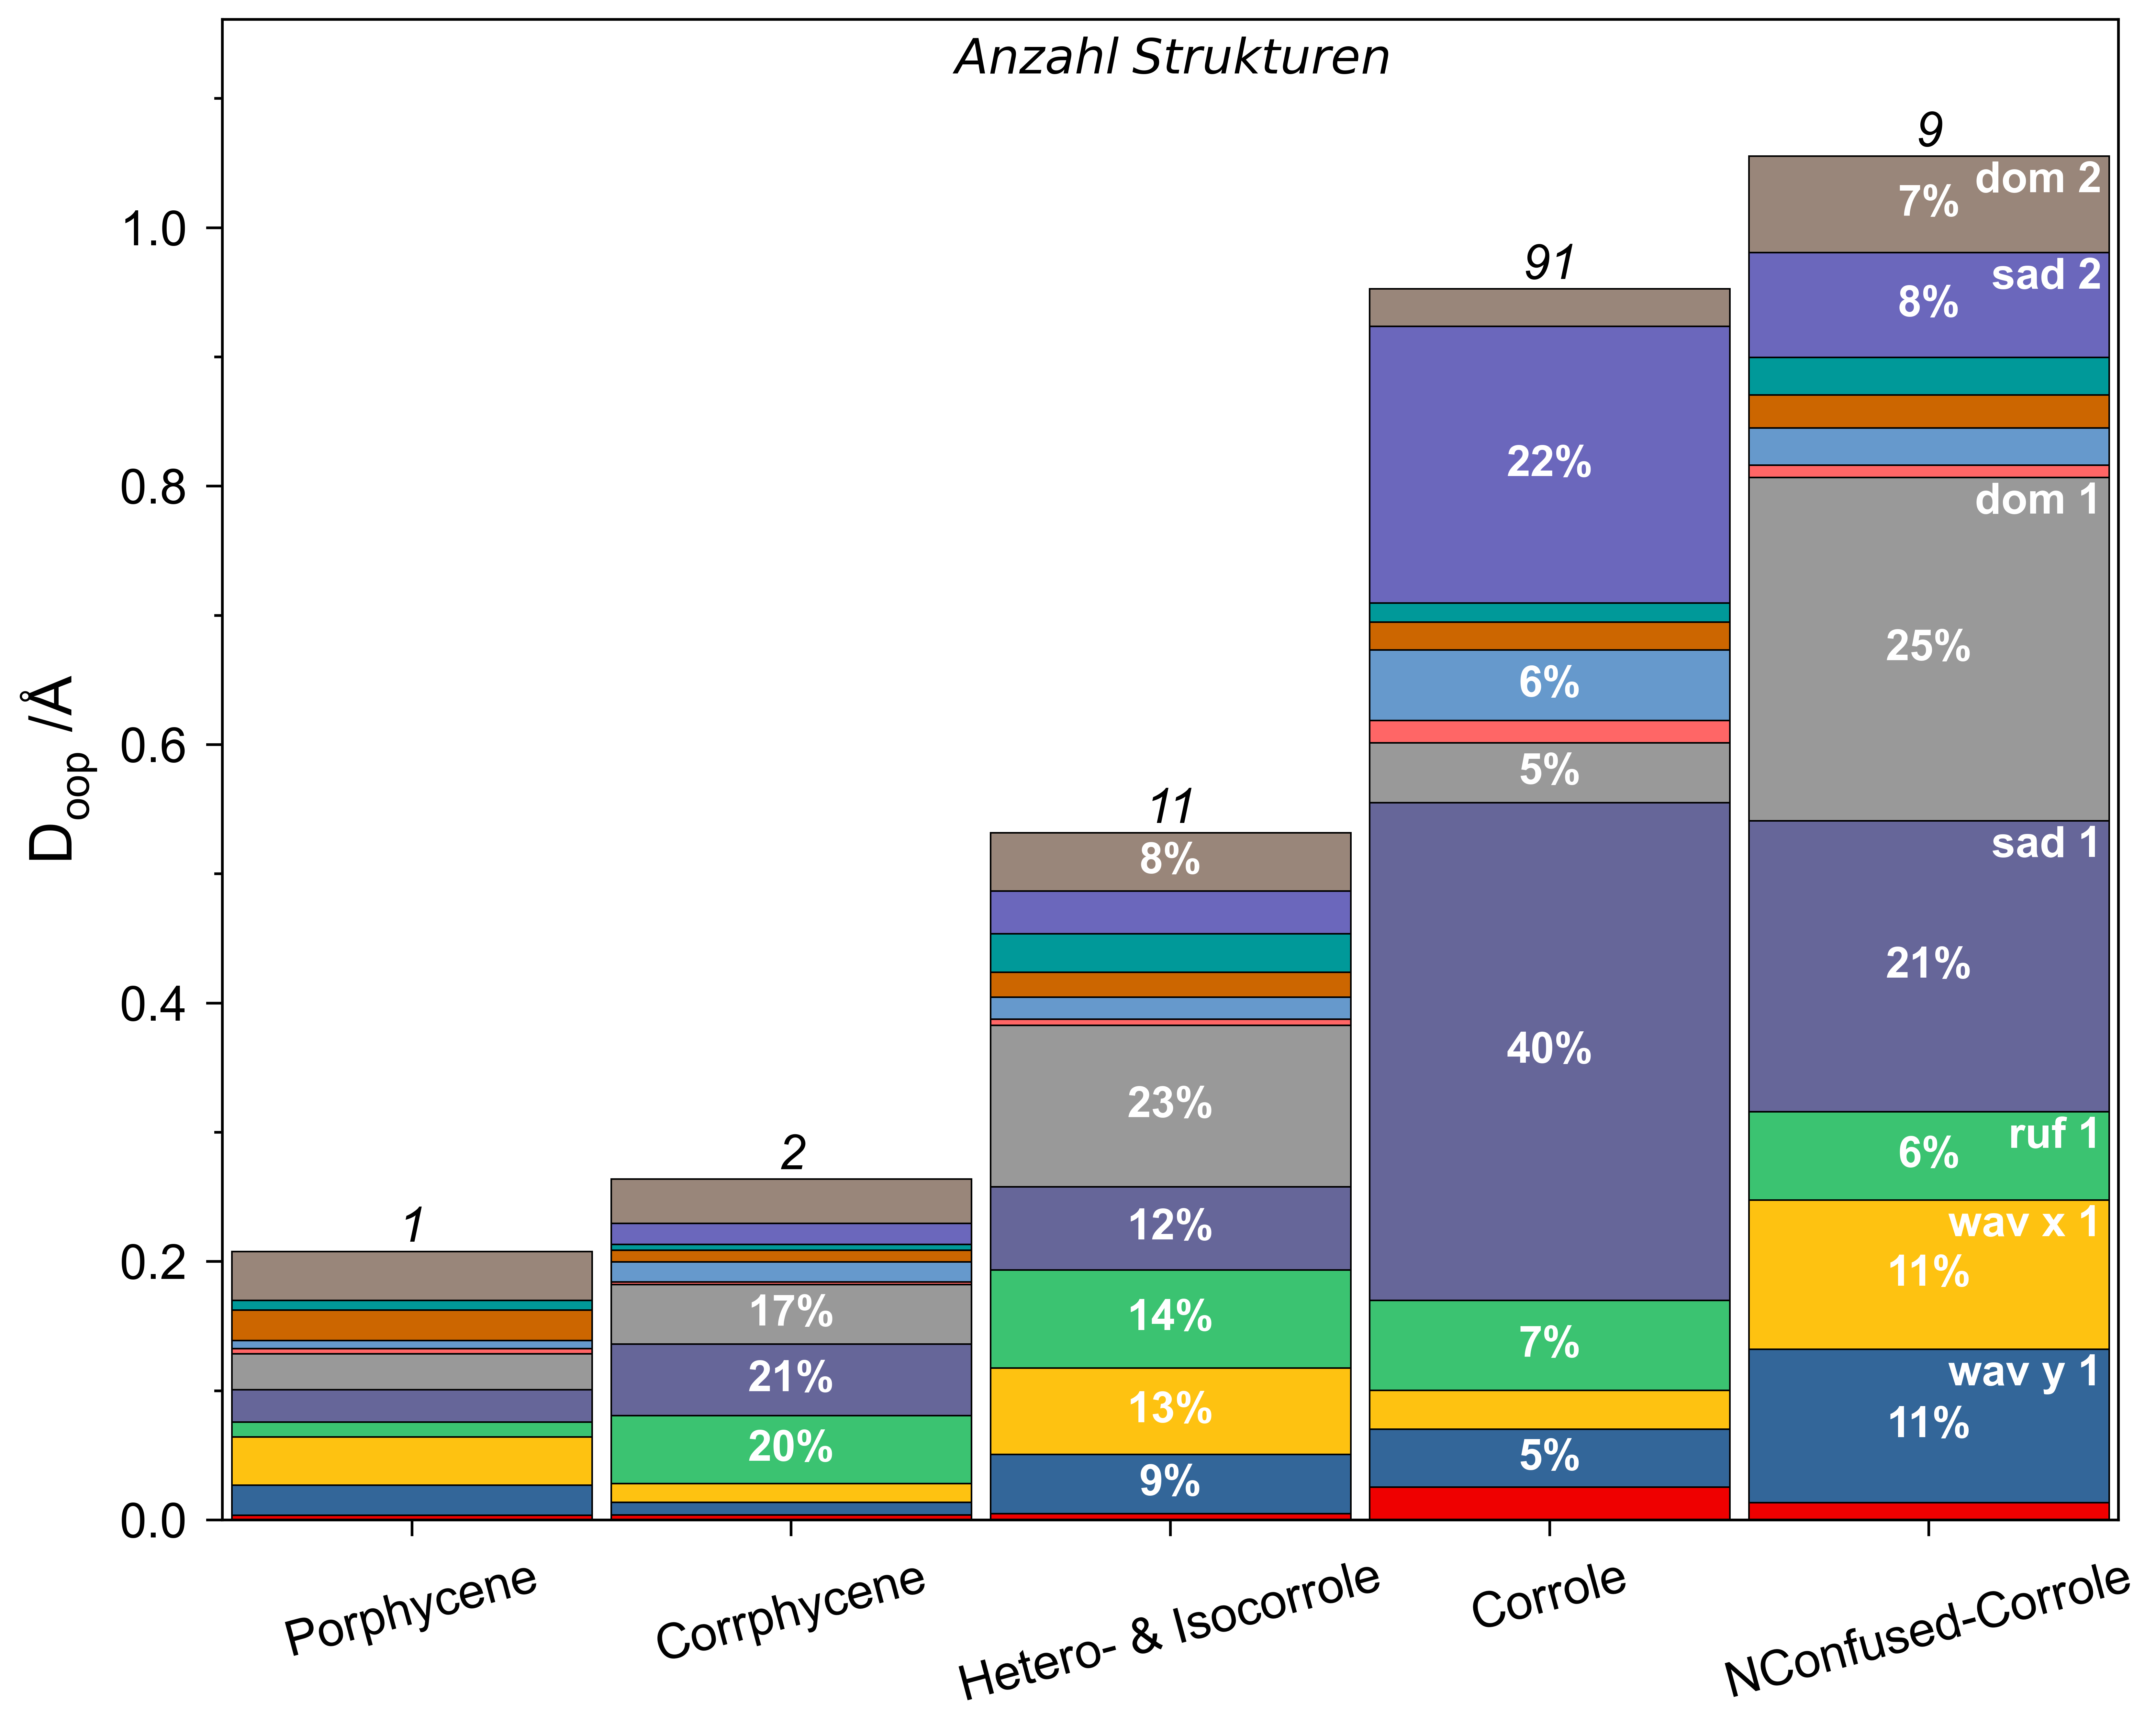

In [35]:
group = dataset.loc[(dataset["Metal"] == "Cu")]
group["Class"] = group.apply(lambda x:
                    "Corrphycene" if "corrphycene" in x["Class"]
                    else "Hetero- & Isocorrole" if x["Class"] in ["Isocorrole", "Heterocorrole"]
                    else x["Class"],
                    axis=1)
by = "Class"
group = groupBy(group, constants.percColumns, by)
group.sort_values("DoopExp", inplace=True)
stackedbar.plot(group, "", constants.analysisColumns, tickRotation=15)

In [57]:
dataset = dataset.loc[(dataset["Metal"] == "Ni") & (dataset["Class"] == "Norcorrole")]# & (dataset["Metal"] == "Ni")]
dataset["Metal"] = dataset.apply(lambda x:
    "$H_4$" if x["Ligand"].endswith("(2+)")
    else x["Metal"]
,axis=1)
by = "SubstNo"
tm = ["3","4","5","6","7","8","9","10","11","12"]
group = groupBy(dataset, constants.percCompColumns, by)
# group = groupBy(dataset, constants.percColumns, by)
# group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
# group = group.loc[(group.index >= 4) & (group.index <=6)]
# group.sort_values("DoopExp", inplace=True)
stackedbar.plot(group, "Anzahl peripherer Substituenten", constants.compColumns, print_legend=True, ncol=2)#, tickRotation=-15)
#stackedbar.plot(group, constants.x_axis_labels[by], constants.analysisColumns, print_legend=True, ncol=2)

ValueError: Columns must be same length as key

In [ ]:
by = "Metal"
metals = [ "Al", "Ga", "In", "Tl", "Si", "Ge", "Sn", "Pb", "P", "As", "Sb", "Bi"]
metals = [  "Ga", "In", "Tl", "Si", "Ge", "Sn", "Pb", "P", "As", "Sb", ]
maingroups = dataset.loc[dataset["Metal"].isin(metals)]
group = groupBy(maingroups, constants.percCompColumns, by)
# group = groupBy(dataset, constants.percColumns, by)
group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
# group = group.loc[(group.index >= 4) & (group.index <=6)]
stackedbar.plot(group, constants.x_axis_labels[by], constants.compColumns, print_legend=True, ncol=2)
#stackedbar.plot(group, constants.x_axis_labels[by], constants.analysisColumns, print_legend=True, ncol=2)

In [ ]:
by = "CoordNo_"
m3d = periodictable.m3d.copy()
m4d = periodictable.m4d.copy()
m5d = periodictable.m5d.copy()
tm = dataset.loc[dataset["Metal"].isin(m3d+m4d+m5d)]
# tm = tm.loc[tm["Group"] != "11"]
tm["D"] = tm.apply(
    lambda x:
        "3d" if x["Metal"] in m3d
        else "4d" if x["Metal"] in m4d
        else "5d" if x["Metal"] in m5d
        else "",
    axis=1
)
tm["CoordNo_"] = tm.apply(
    lambda x:
        "4" if x["CoordNo"] == 4 and x["Group"] != "11"
        else "4 (Gruppe 11)" if x["CoordNo"] == 4
        else x["CoordNo"] if x["CoordNo"] > 4 and x["CoordNo"] <=6
        else "sonstige",
        axis=1
)

group = groupBy(tm, constants.percCompColumns, by)
# group = groupBy(dataset, constants.percColumns, by)
group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
# group = group.loc[(group.index >= 4) & (group.index <=6)]
stackedbar.plot(group, constants.x_axis_labels[by], constants.compColumns, print_legend=False, ncol=2)
#stackedbar.plot(group, constants.x_axis_labels[by], constants.analysisColumns, print_legend=True, ncol=2)

In [ ]:
by="CCDC"
le_group = ["Zn"]#, "Ag", "Au"]#["Ni"]#, "Pd", "Pt"]#["Co"]#, "Rh", "Ir"]#["Fe", "Ru", "Os"]
data_group = dataset.loc[dataset["Metal"].isin(le_group)]
# data_group = data_group.loc[data_group["SubstNo"] == 11]
data_group["Rad"] = data_group.apply(lambda x:
    "At-Komplex" if x["Ligand"].endswith("-") or "+" in x["CoSolv"]
    # else "Kation" if x["Ligand"].endswith("+") or "-" in x["CoSolv"]    else "Dimer" if x["Ligand"].endswith("Dimer")
    else "β-annelliert" if "Benzo" in x["Ligand"] or "Pyrazino" in x["Ligand"] 
    else "Oktaalkyl" if x["Ligand"].startswith("TE") or x["Ligand"].startswith("OE") or x["Ligand"].startswith("HM") or x["Ligand"].startswith("HE")
    # else "Verkn. Cβ-meso-Aryl" if "Naphto" in x["Ligand"]
    else "Octabromo" if x["Ligand"].startswith("Br8")
    else "Octaiodo" if x["Ligand"].startswith("I8")
    else "Octafluoro" if x["Ligand"].startswith("F8")
    else "Octa-$CF_3$" if x["Ligand"].startswith("(CF3)8")
    else "Octaaryl" if x["Ligand"].startswith("Ph8") or x["Ligand"].startswith("Tol8") or x["Ligand"].startswith("(OMePh)")or x["Ligand"] or x["Ligand"].startswith("(CF3Ph)8") or x["Ligand"].startswith("(CF3-Ph)8")
    else "vollsubst." if x["SubstNo"] == 11
    else "andere", axis=1)
# data_group["AxialLigand"] = data_group.apply(lambda x:
#     "$(NH_3)_2$" if x["AxialLigand"] == "(NH3)2"
#     else "$Py_2$" if x["AxialLigand"] == "Py2"
#     else "$OMePy_2$" if x["AxialLigand"] == "OMePy2"
#     else "$PPh_3$" if x["AxialLigand"] == "PPh3"
#     else "$" + x["AxialLigand"] + "$", 
#     axis=1)
# iv = ["Cl", "Me", "Ph", "OH", "F", "Triflate","μ-O"]
# iii = ["H2O", "Py", "Py2", "(Py)2", "MeCN"]
# data_group["Ox"] = data_group.apply(
#     lambda x: 
#     "+III" if x["AxialLigand"] in iii
#     else "+IV" if x["AxialLigand"] in iv 
#     else "NO" if x["AxialLigand"] == "NO"
#     else "+II" 
#     ,axis=1)
# data_group = data_group.loc[data_group["Ox"] == "+IV"]
group = groupBy(data_group, constants.percCompColumns, by)
# group = groupBy(data_group.loc[data_group["Ox"].isin(["+IV"])], constants.percCompColumns, by)
group.sort_values("DoopExp", inplace=True, ascending=True)
# group.sort_index(key=lambda x: np.argsort(index_natsorted(group.index)), inplace=True)
stackedbar.plot(group, "CCDC Code", constants.compColumns, print_legend=False, ncol=2)#, tickRotation=90)

C:\Users\jenso\AppData\Local\Temp/ipykernel_23544/4120094176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_group["Ox"] = data_group.apply(


(<Figure size 7559.06x6141.73 with 1 Axes>,
 <AxesSubplot:title={'center':'$\\it{Anzahl}$ $\\it{Strukturen}$'}, xlabel='Formale Oxidationsstufe', ylabel='$\\mathregular{D_{oop}}$ /Å'>)

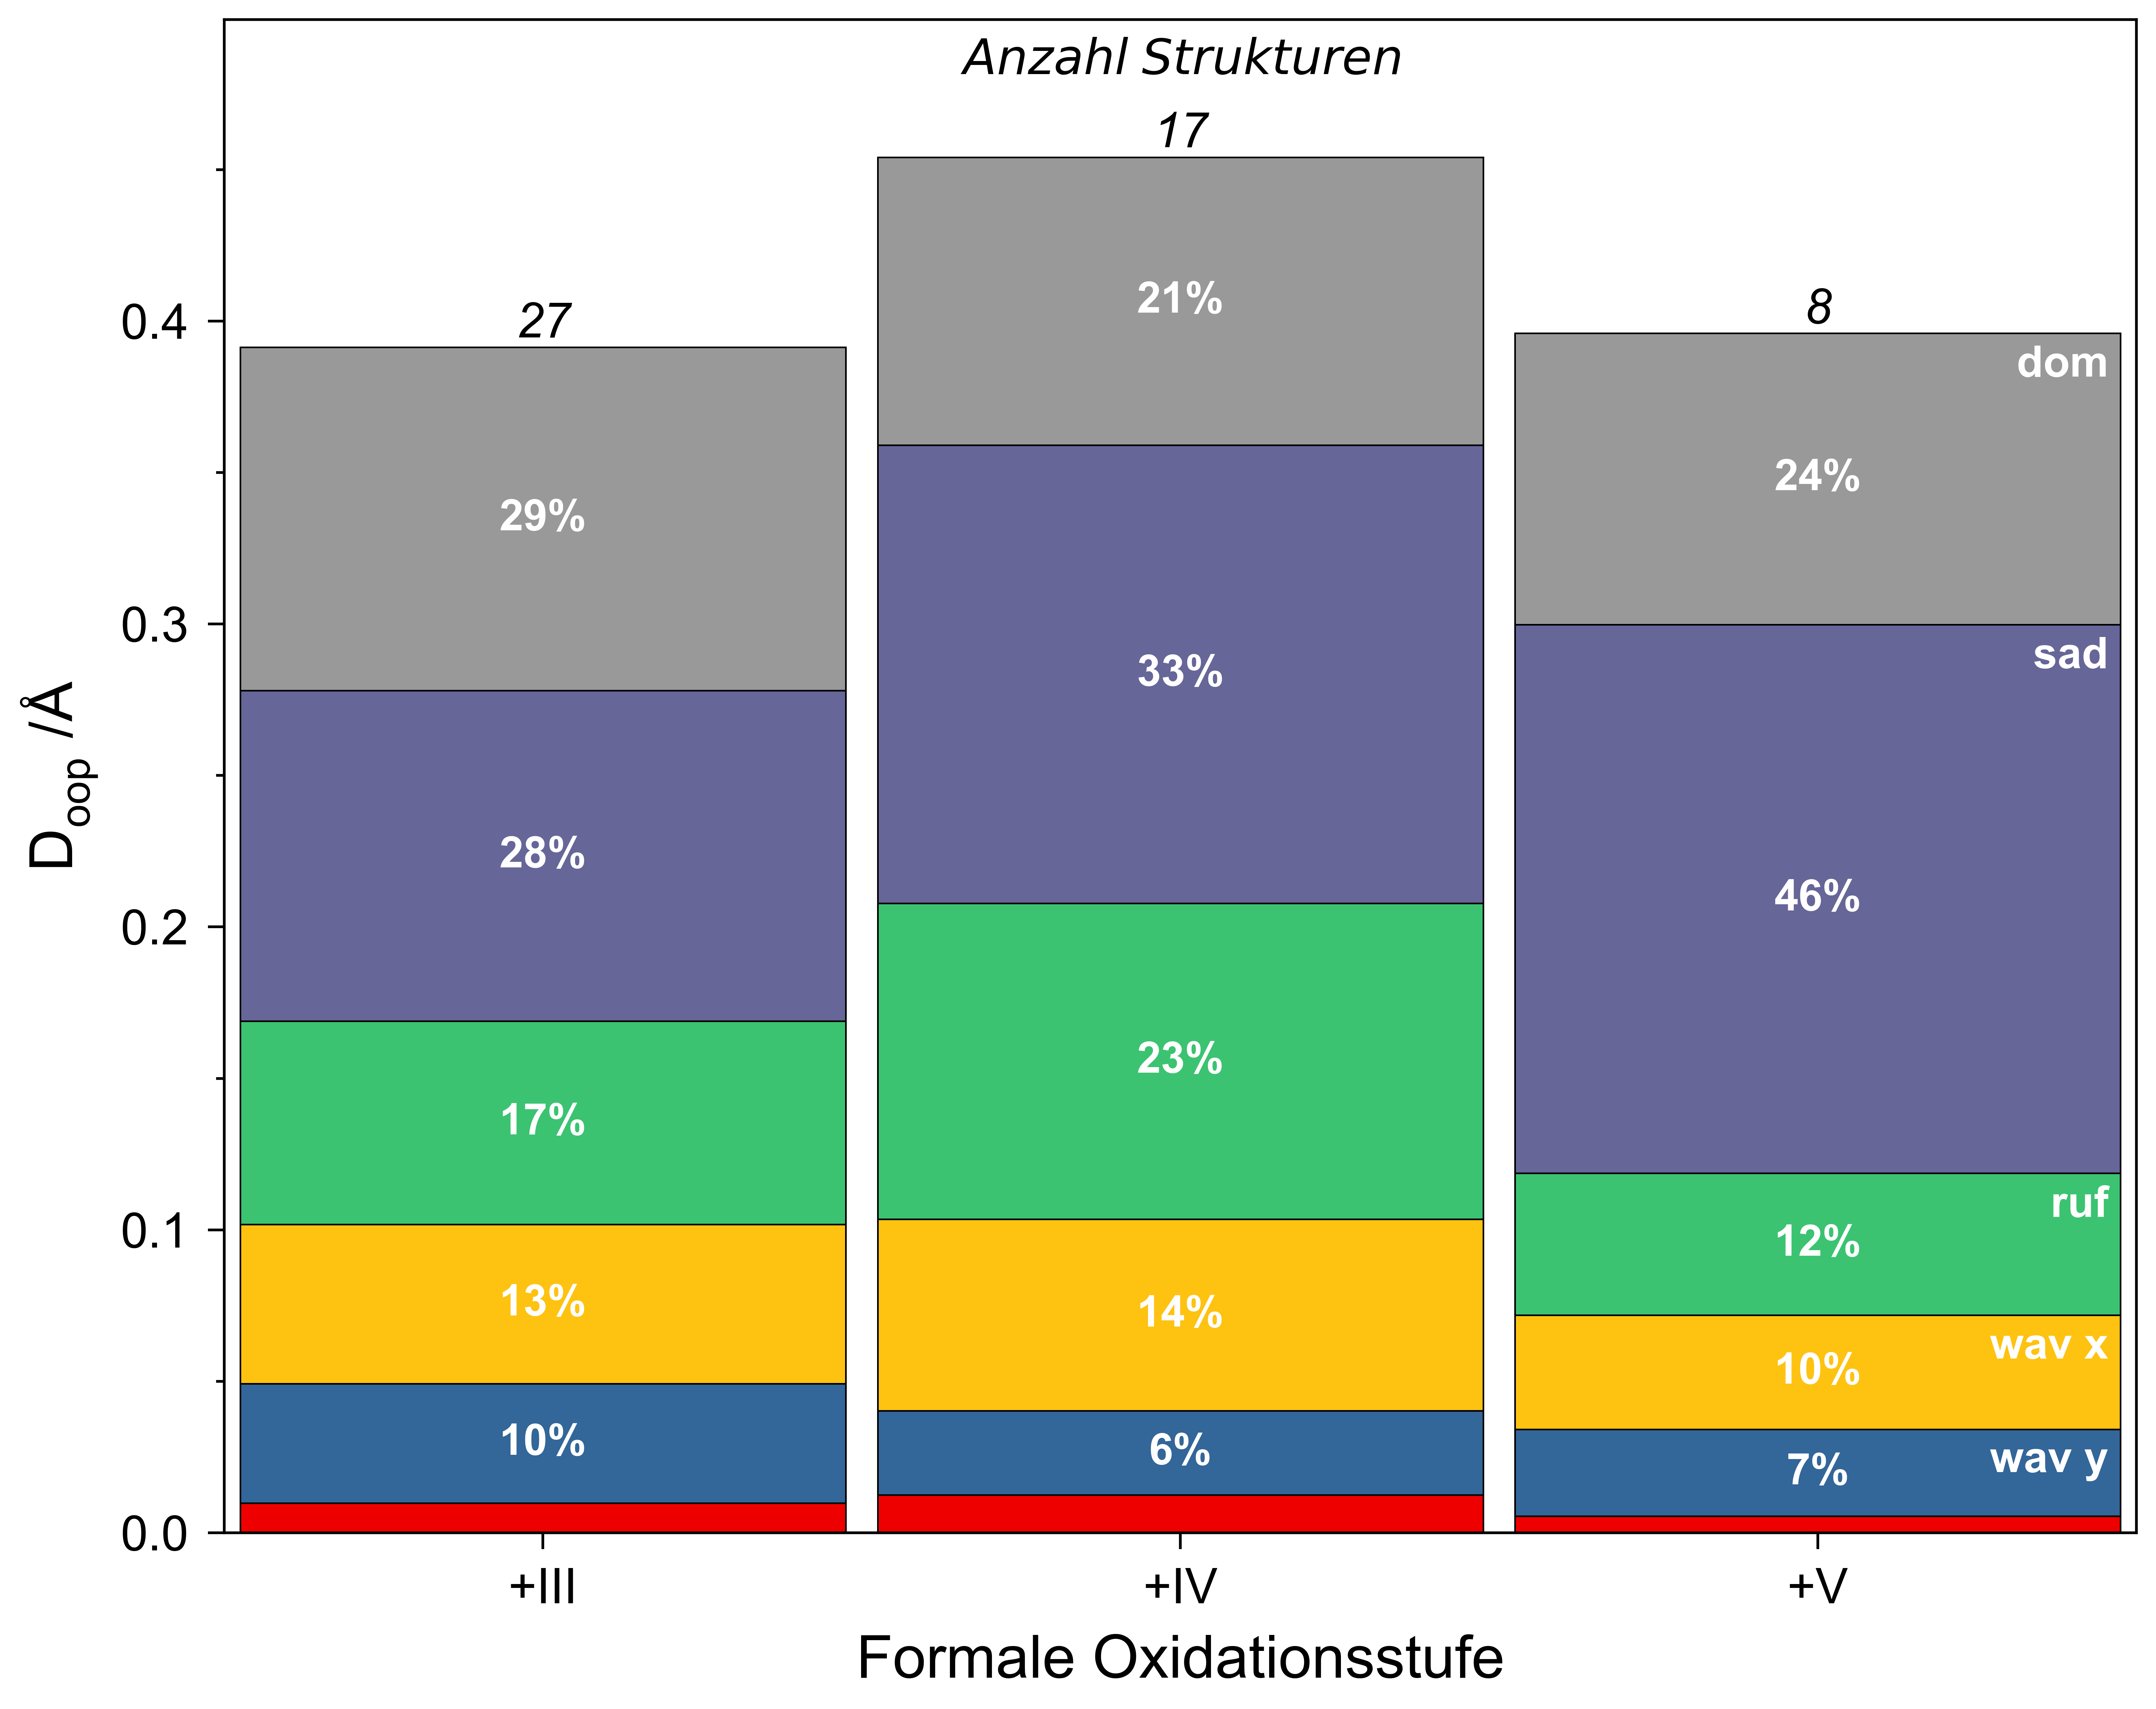

In [ ]:
by="Ox"
le_group = ["Mn"]#, "Tc", "Re"]
# le_group = ["Zn", "Hg", "Cd"]
# le_group = ["Cu", "Ag", "Au"]
data_group = dataset.loc[dataset["Metal"].isin(le_group)]
# data_group = dataset.loc[dataset["Group"] == "Ln"]
# group = groupBy(data_group, constants.percColumns, by)
iv = ["Cl", "OH", "I", "Br", "Ph", "Br-Ph"]
v = ["O", "N", "NMes"]
data_group["Ox"] = data_group.apply(
    lambda x: 
    "Cl" if x["AxialLigand"] in []#"Cl", "I", "Br", "Br-Ph"]
    else "+V" if x["AxialLigand"] in v
    else "+IV" if x["AxialLigand"] in iv 
    else "+III"
    ,axis=1)
ox = ["+III", "+IV","+V", "Cl"]
group = groupBy(data_group, constants.percCompColumns, by) #data_group.loc[data_group["Ox"].isin(["+IV"])],
# group.sort_index(key=lambda x: np.argsort(le_group), inplace=True)
# group.sort_values("DoopExp", inplace=True, ascending=True)
stackedbar.plot(group, "Formale Oxidationsstufe", constants.compColumns, print_legend=False, ncol=2)#, tickRotation=90)

In [ ]:
by="AxialLigand"
le_group = ["Fe"]
data_group = dataset.loc[dataset["Metal"].isin(le_group)]
iv = ["Cl", "Me", "Ph", "OH", "F", "Triflate","μ-O"]
iii = ["H2O", "Py", "Py2", "(Py)2", "MeCN"]
data_group["Ox"] = data_group.apply(
    lambda x: 
    "+III" if x["AxialLigand"] in iii
    else "+IV" if x["AxialLigand"] in iv 
    else "NO" if x["AxialLigand"] == "NO"
    else "+II" 
    ,axis=1)
ox = ["+III", "+IV","+V", "Cl"]
group = groupBy(data_group, constants.percColumns, by) #data_group.loc[data_group["Ox"].isin(["+IV"])],
# group.sort_index(key=lambda x: np.argsort(le_group), inplace=True)
# group.sort_values("DoopExp", inplace=True, ascending=True)
stackedbar.plot(group, "Formale Oxidationsstufe", constants.analysisColumns, print_legend=False, ncol=2)#, tickRotation=90)

In [ ]:
III_ls = ["Py2", "(Py)2"]
III_is = ["Py", "MeCN", "H2O"]
III_is_non_innocent = ["Cl", "F", "μ-O", "Triflate"] # aufpassen  Fe[Me8TPC]Cl ist ferrom. coupled S=2 vs. S=1 bei sonst
IV_ls = ["Ph", "Me", "OH"] # S=1
muO = []

by="Ox"
le_group = ["Fe"]
data_group = dataset.loc[dataset["Metal"].isin(le_group)]
data_group["Ox"] = data_group.apply(
    lambda x: 
    "+III l.s." if x["AxialLigand"] in III_ls
    else "+III i.s." if x["AxialLigand"] in III_is
    # else "+III i.s. non-innocent f." if x["CCDC"] == "CAYCAH"
    else "+III i.s. [Cor]*" if x["AxialLigand"] in III_is_non_innocent and x["CCDC"] != "CAYCAH"
    else "+IV" if x["AxialLigand"] in IV_ls 
    else "NO" if x["AxialLigand"] == "NO"
    else "mu" if x["AxialLigand"] in muO
    else "+II" if x["CCDC"] != "CAYCAH"
    else ""
    ,axis=1)
data_group = data_group.loc[data_group["CCDC"] != "CAYCAH"]
# ox = ["+III", "+IV","+V", "Cl"]
group = groupBy(data_group, constants.percCompColumns, by) #data_group.loc[data_group["Ox"].isin(["+IV"])],
# group.sort_index(key=lambda x: np.argsort(ox), inplace=True)
# group.sort_values("DoopExp", inplace=True, ascending=True)
stackedbar.plot(group, "Oxidationsstufe", constants.compColumns, print_legend=False, ncol=2)#, tickRotation=90)

In [ ]:
from data import datautil
data_hic = datautil.applyHICSubclass(dataset)
data_hic["Error"] = (data_hic["DoopExp"] - data_hic["DoopSim"])/data_hic["DoopExp"] * 100
data_hic = datautil.getHeteroAtom(data_hic)
data_hic = datautil.getIsoSubstituent(data_hic)
by = "Iso"
data_hic = data_hic.loc[data_hic["Subclass"] == "10-Isocorrole"]
# data_hic["HeteroM"] = data_hic["Metal"]  + "/" + data_hic["Heteroatom"]
# data_hic = data_hic.loc[~data_hic["Subclass"].isin(["Nope"])]#, "sonstige Isocorrole"])
group = groupBy(data_hic, constants.percCompColumns, by)
group.sort_values("DoopExp", inplace=True, ascending=True)
# group.sort_index(key=lambda x: np.argsort(["N-Heterocorrole", "10-Heterocorrole", "Corrolazine", "5-Isocorrole", "10-Isocorrole", "sonstige Isocorrole"]), inplace=True)

fig, ax = stackedbar.plot(group, "", constants.compColumns, print_legend=True, ncol=2, tickRotation=15)

In [ ]:
cn = dataset.loc[dataset["Class"] == "Corrolazine"]
group = groupBy(cn, constants.percCompColumns, "Metal")
stackedbar.plot(group, "", constants.compColumns, print_legend=True, ncol=2)

In [ ]:
data_n = dataset.loc[dataset["Class"].isin(["NR-Corrole"])]#["NConfused-Corrole"])]#"NR-Corrole", 
data_n = datautil.getConfusedSubclass(data_n)
data_n = datautil.getNSubst(data_n)
data_n["Special"] = data_n["Confusion"] + data_n["NSubst"]
data_n["Special"] = data_n.apply(
    lambda x:
    "$N_A$,$N_B$-verbrückt" if (x["Special"] == "$N_A$-CO-$N_B$" or x["Special"] == "$N_A$-$CH_2$-$N_B$")
    else "$N_A$,$N_B$-disubst." if x["Special"] == "$N_B$-Me & $N_A$-Me"
    else "$N_A$ substituiert" if (x["Special"].startswith("$N_A"))
    else "$N_B$ substituiert" if x["Special"].startswith("$N_B")
    else x["Special"]
    ,axis=1)
group = groupBy(data_n, constants.percCompColumns, "Metal")

group.sort_values("DoopExp", inplace=True, ascending=True)
stackedbar.plot(group, "", constants.compColumns, print_legend=False, ncol=2)#, tickRotation=15)

In [ ]:
all = datautil.applyAllSubclasses(dataset)
all_group = groupBy(all, constants.percCompColumns, "Subclass")
stackedbar.plot(all_group, "", constants.compColumns, tickRotation=90)